# Using python and circuit learn to impliment the nearest neighbor algorithm

In [39]:
import pandas as pd
import numpy as np

In [40]:
#in here we will import our visuilization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# we are going to pretent that we have been given a classified data set from a company
df = pd.read_csv('Classified Data',index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
# in here we will create an instance of a standard scaler just like we would for a normal machine learning algorithms
scaler = StandardScaler()

In [12]:
#in here we will fit the scaler to our data
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [18]:
# in here we will use the scaler object to do a transformation
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [22]:
#in here we will check out the scaled features and will recreate a feature dataFrame
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [24]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [26]:
# let us move along to the train test split now that the data is ready
from sklearn.model_selection import train_test_split

In [29]:
X= df_feat
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
#in here we will use the KNN
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# we will specify the number of neighbors we need for the model
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
#we will fit the knn model to a traning data here
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
pred = knn.predict(X_test)

In [35]:
#in here we will do a prediction and an evaluation of our KNN model 
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [42]:
#in here we did an albow method to plot out a variety of K-values
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train) # we will fit that model to our training set
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #in here we appened the error rate of where the predictions do not match the y_test

Text(0, 0.5, 'Erroe Rate')

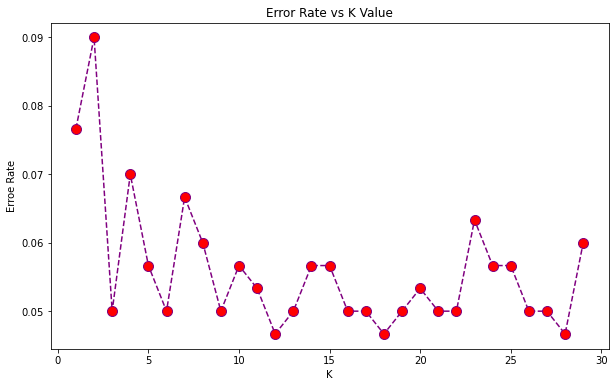

In [45]:
#we will plot this out
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='purple',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Erroe Rate')

In [50]:
#in here we try to compare a K value
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train) 
pred_i = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

